<a href="https://colab.research.google.com/github/skalski/Tensorflow-Playbooks/blob/main/Auto_Pilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

I create a little autopilot mock. In this Playbook I will face a simple pitch solver for a fictive aircraft. 

In [3]:
pitch_degrees = np.array([-30, -20,  -10,  0, 10, 20, 30],  dtype=float)
stick_pitch_level = np.array([3, 2, 1, 0, -1, -2, 3],  dtype=float)

for i,c in enumerate(pitch_degrees):
  print("{} pitch of aircraft in degree = {} Level of stick to level back to maintain flightlevel ".format(c, stick_pitch_level[i]))

-30.0 pitch of aircraft in degree = 3.0 Level of stick to level back to maintain flightlevel 
-20.0 pitch of aircraft in degree = 2.0 Level of stick to level back to maintain flightlevel 
-10.0 pitch of aircraft in degree = 1.0 Level of stick to level back to maintain flightlevel 
0.0 pitch of aircraft in degree = 0.0 Level of stick to level back to maintain flightlevel 
10.0 pitch of aircraft in degree = -1.0 Level of stick to level back to maintain flightlevel 
20.0 pitch of aircraft in degree = -2.0 Level of stick to level back to maintain flightlevel 
30.0 pitch of aircraft in degree = 3.0 Level of stick to level back to maintain flightlevel 


In [4]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [5]:
model = tf.keras.Sequential([l0])

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

To avoid overfitting and save unneeded epochs I add a callback here.

In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [8]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1),
              metrics=['accuracy'])
history = model.fit(pitch_degrees, stick_pitch_level, epochs=500, verbose=False, callbacks=[callbacks])
print("Finished training the model")

Finished training the model


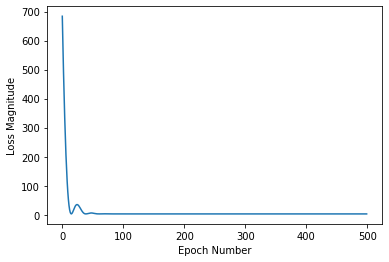

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

Let's see what our prediction can do. We try to keep the aircraft on a zero level to maintain the actual height.

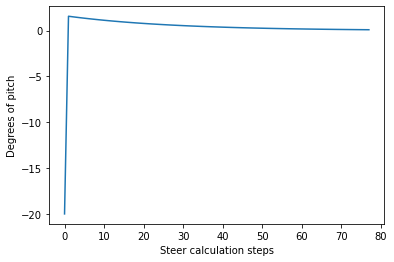

In [10]:
inital_pitch = -20.0 #The nose is showing 20 degrees towards ground, the plain must steer against.
current_steer_level = 1

pitch_degrees_history = np.array([inital_pitch], dtype=float)

while current_steer_level < -0.1 or current_steer_level > 0.1:
  current_steer_level = model.predict([inital_pitch])
  inital_pitch = inital_pitch + current_steer_level
  pitch_degrees_history = np.append(pitch_degrees_history, np.array([current_steer_level], dtype=float))
  
import matplotlib.pyplot as plt
plt.xlabel('Steer calculation steps')
plt.ylabel("Degrees of pitch")
plt.plot(pitch_degrees_history)

When we see that the pitch rapitly stops and correct the issue of the dangerous situation. Now we do the same with a positive degree, where the nose shows up.

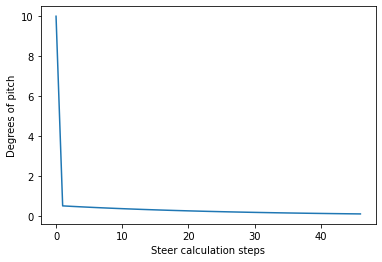

In [11]:
inital_pitch = 10.0 #The nose is showing 10 degrees up, the plain must steer against.
current_steer_level = 1

pitch_degrees_history = np.array([inital_pitch], dtype=float)

while current_steer_level < -0.1 or current_steer_level > 0.1:
  current_steer_level = model.predict([inital_pitch])
  inital_pitch = inital_pitch + current_steer_level
  pitch_degrees_history = np.append(pitch_degrees_history, np.array([current_steer_level], dtype=float))
  
import matplotlib.pyplot as plt
plt.xlabel('Steer calculation steps')
plt.ylabel("Degrees of pitch")
plt.plot(pitch_degrees_history)

Our fictive Aircraft is doing well. Now he have to learn, that the first steering is quiet to hard and leads to stall.